In [1]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

C:\Users\p192\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\p192\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
import os

#getting image data
train_horse_dir = os.path.join('./horse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)
print(f'horse {train_horse_names[:10]}')
print('total training horse images:', len(train_horse_names))


train_human_dir = os.path.join('./horse-or-human/humans')
train_human_names = os.listdir(train_human_dir)
print(f'\nhuman {train_human_names[:10]}')
print('\ntotal training human images:', len(train_human_names))


# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'\nVAL SET HUMANS: {validation_human_names[:10]}')

print(f'\ntotal validation horse images: {len(os.listdir(validation_horse_dir))}')

print(f'ntotal validation human images: {len(os.listdir(validation_human_dir))}')

horse ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
total training horse images: 500

human ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']

total training human images: 527
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']

VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']

total validation horse images: 128
ntotal validation human images: 128


### Getting some images

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. We can rerun the cell to see a fresh batch each time:



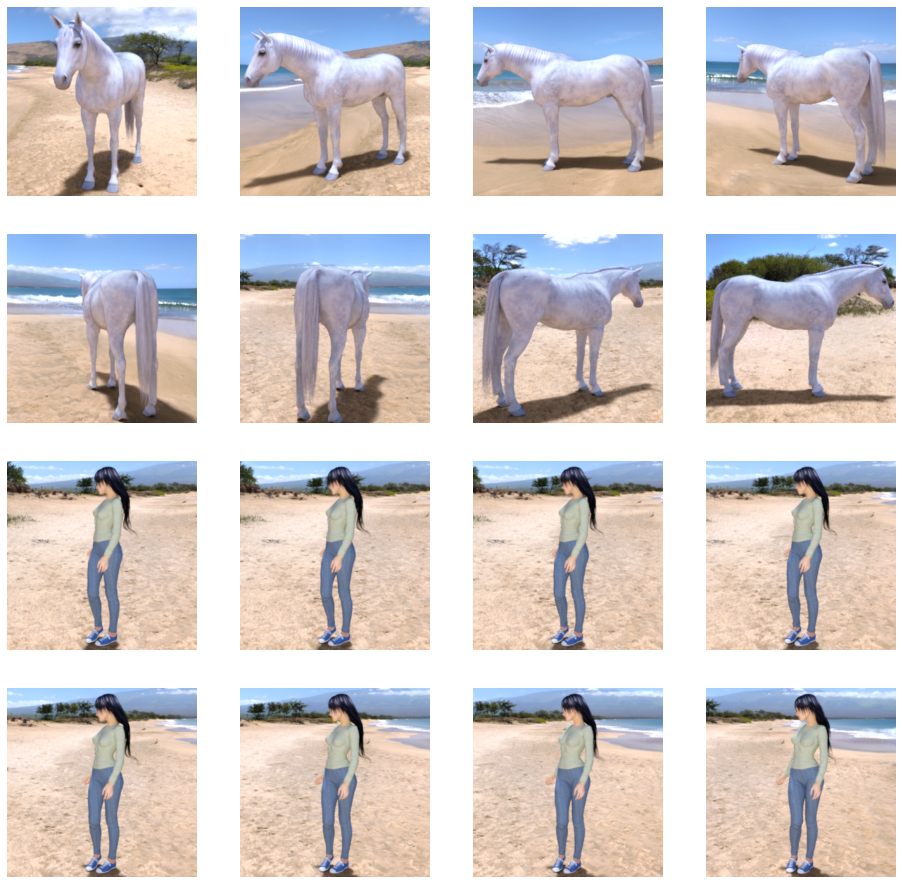

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
model =  tf.keras.models.Sequential([
    # 1st convolution - input shape is 300by300 and had RGB
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # 5th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    #Flatten the results to feed to dense layer
    tf.keras.layers.Flatten(),
    # hidden dense layer of 512 neurons
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.0001),
             metrics = ['accuracy'])


### Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling images oin 0 - 1 range
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


#flow training images from directory using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                   './horse-or-human/',        # directory containing subdirectory 
                   target_size = (300, 300),   #images to be resized to 300by300 pixel
                   batch_size = 128,             #1024/8 - flowing images in 128 batches of 128 data points.
                   class_mode = 'binary'       #since we used binary_crossentropy so using binary
)


# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Model Fitting

In [9]:
history = model.fit(train_generator, 
                   steps_per_epoch=8,   # each epochs has 8 steps
                   epochs = 15,         # total epochs are 15
                   verbose = 1,
                   validation_data = validation_generator,
                   validation_steps=8)

# focus on loss and accuracy - tune learning rate if accuracy changes a lot in each epochs

Epoch 1/15
8/8 [==============================] - 28s 3s/step - loss: 0.6864 - accuracy: 0.5150 - val_loss: 0.6758 - val_accuracy: 0.6289
Epoch 2/15
8/8 [==============================] - 28s 4s/step - loss: 0.6686 - accuracy: 0.6263 - val_loss: 0.6573 - val_accuracy: 0.5625
Epoch 3/15
8/8 [==============================] - 27s 4s/step - loss: 0.6354 - accuracy: 0.6251 - val_loss: 0.6248 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 33s 4s/step - loss: 0.5858 - accuracy: 0.7812 - val_loss: 0.5855 - val_accuracy: 0.6875
Epoch 5/15
8/8 [==============================] - 30s 4s/step - loss: 0.5412 - accuracy: 0.7820 - val_loss: 0.5759 - val_accuracy: 0.6445
Epoch 6/15
8/8 [==============================] - 31s 4s/step - loss: 0.5095 - accuracy: 0.7742 - val_loss: 0.5256 - val_accuracy: 0.7383
Epoch 7/15
8/8 [==============================] - 31s 4s/step - loss: 0.4222 - accuracy: 0.8387 - val_loss: 0.4405 - val_accuracy: 0.8320
Epoch 8/15
8/8 [==================

### Making predictions 

Applying the model on real life images and predicting the class.

In [10]:
# CODE BLOCK FOR OLD VERSIONS OF SAFARI

import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images = os.listdir("./tmp")

print(images)

for i in images:
 print()
 # predicting images
 path = './tmp/' + i
 img = load_img(path, target_size=(300, 300))
 x = img_to_array(img)
 x /= 255
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a human")
 else:
   print(i + " is a horse")

['horse-561221_1280.jpg', 'istockphoto-1398066425-1024x1024.jpg']

1/1 [==============================] - 0s 175ms/step
[0.93833256]
horse-561221_1280.jpg is a human

1/1 [==============================] - 0s 46ms/step
[0.6971387]
istockphoto-1398066425-1024x1024.jpg is a human


### Visualizing Intermediate Representations

As before, you can plot how the features are transformed as it goes through each layer.

1/1 [==============================] - 0s 123ms/step


C:\Users\p192\AppData\Local\Temp/ipykernel_1152/846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\p192\AppData\Local\Temp/ipykernel_1152/846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


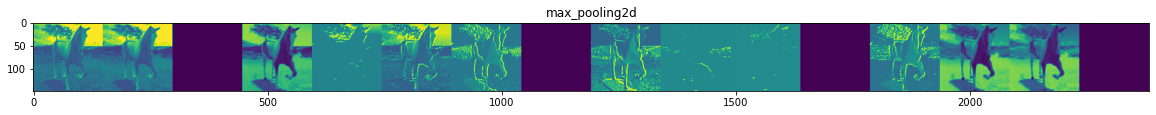

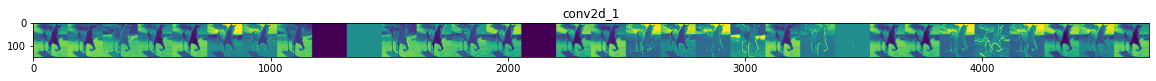

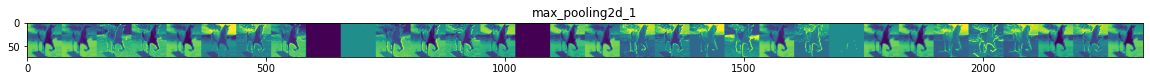

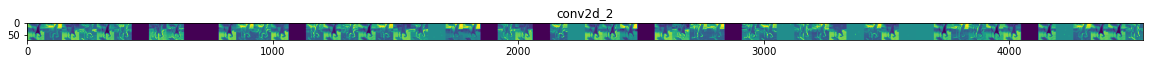

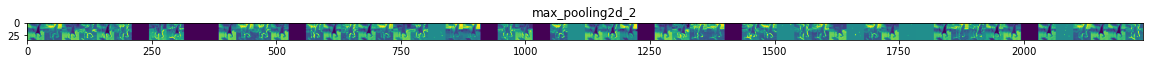

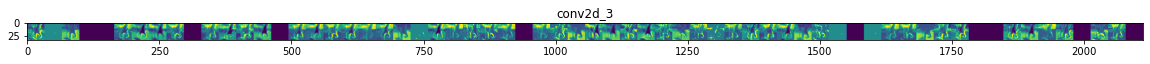

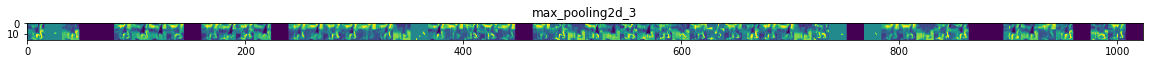

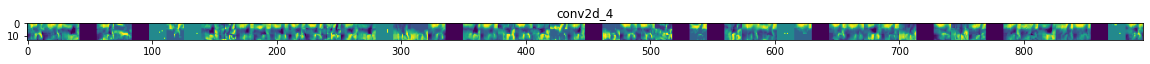

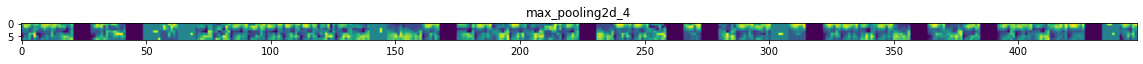

In [11]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')